<div style="display: flex; align-items: center;">
    <img src="https://github.com/angeloBuso/ppca-dados-massivos/blob/main/dados/UNB-logo.png?raw=true" alt="UNB logo" width="180" style="margin-right: 10px;">
    <h1>Programa de Pós-graduação em Computação Aplicada – PPCA (UnB)</h1>
</div>

<h2>Análise Estatística de Dados e Informações</h2>

<h5>Professor: João Gabriel de Moraes Souza</h5>
<h5>Aluno: <a href="https://tr.ee/On58b8WbPz" target="_blank">Angelo Donizete Buso Júnior</a></h5>

<h4>Técnicas Estatisicas - ANOVA Aplicadas ao mercado Imobiliário</h4>

<p>A estatística aplicada ao mercado imobiliário desempenha um papel fundamental na análise e compreensão dos fatores que influenciam os preços das propriedades. Por meio de técnicas como validação de pressupostos e testes de hipótese, é possível identificar relações significativas entre variáveis como localização, qualidade construtiva e características físicas das propriedades.</p>

<p>Uma dessas ferramentas é o uso da Análise de Variância (ANOVA), permite avaliar avaliar se há diferenças significativas nos preços médios entre grupos categorizados, como bairros ou níveis de qualidade. Contudo, a aplicação do ANOVA requer o cumprimento de pressupostos de normalidade e homogeneidade das variâncias, essenciais para garantir a validade dos resultados. Se tais pressupostos são violados, a análise é complementada por técnicas não paramétricas, permitindo insights robustos sobre a influência de diferentes características no mercado imobiliário.</p>

<h4>Problemática a ser resolvida</h4>

<p>O presente estudo tem como objetivo procurar responder, com base em evidencia estatística, à seguinte pergunta: "Selecionado algumas características, estas afetam significativamente o preço médio de venda das propriedades?".</p>

<p>E como pergunta alternativa responder ao marketing "É possível realizar uma estratégia de preços única, sem comprometer a percepção de valor no mercado?"</p>

<p>Para alcançar o objetivo, seguimos as etapas abaixo:</p>

<h3>Metodologia</h3>

<h4>1. Exploração Inicial dos Dados</h4>
<p>
Foi realizada uma análise exploratória para compreender a distribuição de <code>SalePrice</code> e a relação com as três variáveis selecionadas. Identificamos que os dados de <code>SalePrice</code> apresentavam assimetria positiva, indicando a possibilidade de comportamento não linear.
</p>

<h4>2. Teste ANOVA Tradicional</h4>
<p>
A <strong>ANOVA</strong> é uma técnica estatística que avalia se há diferenças significativas entre as médias de grupos categóricos, como bairros ou níveis de qualidade. No entanto, para sua aplicação, é necessário que os dados atendam aos pressupostos de <strong>normalidade</strong> e <strong>homogeneidade de variâncias</strong>. Esses pressupostos são essenciais para a validade dos resultados.
</p>

<h4>3. Abordagem Não Paramétrica</h4>
<p>
Quando os pressupostos da ANOVA não são atendidos, utilizamos técnicas não paramétricas como o <strong>Teste de Kruskal-Wallis</strong>, que não requer normalidade nem homogeneidade das variâncias, sendo ideal para avaliar diferenças entre grupos categóricos em situações onde os dados não seguem distribuições normais.
</p>

<h4>4. Análise Post-Hoc</h4>
<p>
Após identificar diferenças significativas entre os grupos, foi aplicada a <strong>Análise Post-Hoc</strong> por meio do <strong>Teste de Dunn</strong>. Este teste avalia comparações par a par entre os grupos, ajustando os valores-p para múltiplas comparações, destacando quais grupos específicos possuem diferenças significativas.
</p>

<h4>5. Visualizações</h4>
<p>
Gráficos como violinos e mapas de calor foram utilizados para ilustrar as distribuições de <code>SalePrice</code> e evidenciar as comparações significativas entre os grupos. Essas visualizações complementam a análise ao destacar tendências e padrões nos dados.
</p>



<p>Para Virgillito (2017), o teste ANOVA é uma ferramenta estatística fundamental para avaliar a significância estatística entre grupos. Ele permite verificar se duas ou mais populações apresentam médias significativamente diferentes, utilizando amostras extraídas dessas populações. Em sua explicação, o autor destaca que, "para se comparar o afastamento entre as médias, recorre-se ao conceito de desvio-padrão de cada amostra, o qual, elevado ao quadrado, resulta na variância" (VIRGILLITO, 2017, p. 627). Assim, a análise da variância avalia as diferenças entre as médias por meio do comportamento da variância.</p>

<p>De forma prática, o teste ANOVA é amplamente aplicado em diversas áreas, como pesquisas médicas, produtividade agrícola e até mesmo em estudos de desempenho no marketing. Conforme Virgillito (2017), ele pode ser usado em situações como "a comparação entre a produtividade de dois tipos de grão cultivados com dois tipos de adubo (ANOVA de dois fatores)" ou "a comparação de desempenho de equipes em termos de produtividade e incentivos" (VIRGILLITO, 2017, p. 627).</p>

<p>Além disso, o autor ressalta que, enquanto outros testes comparam apenas duas amostras, o ANOVA "é mais abrangente, visto que pode comparar mais de duas amostras e testar se há ou não igualdade entre as médias das populações das quais elas foram retiradas" (VIRGILLITO, 2017, p. 627). Por isso, é uma técnica essencial em análises multigrupos, tanto com uma variável dependente (ANOVA) quanto com mais de uma variável dependente (MANOVA).</p>


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, shapiro, levene, kruskal, skew, mannwhitneyu
import warnings
import statsmodels.api as sm
from statsmodels.formula.api import ols
import ace_tools_open as tools
import scikit_posthocs as sp


sns.set_theme(style="whitegrid")
plt.rc("figure", figsize=(10, 6))


warnings.filterwarnings('ignore')

<h4>Coleta de dados</h4>

<p>Os dados utilizados nesta análise foram obtidos do repositório público <a href="https://www.kaggle.com/datasets/prevek18/ames-housing-dataset/data">Ames Housing Dataset</a>, disponível na plataforma Kaggle. Contém informações detalhadas sobre propriedades residenciais em Ames, Iowa, incluindo variáveis como localização, qualidade geral e características físicas das propriedades.</p>

In [2]:
try:
    df = pd.read_csv("/home/buso/mestrado/aedi-ppca/dados/AmesHousing.csv")
except FileNotFoundError:
    print("Arquivo não encontrado. Por favor, verifique o caminho do dataset.")

<h3>Dicionário de Dados</h3>

<p>Documento ou estrutura que descreve detalhadamente cada variável presente em um conjunto de dados</p>

<table border="1" cellpadding="5" cellspacing="0">
  <thead>
    <tr>
      <th>Nome da Variável</th>
      <th>Descrição</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>SalePrice</td><td>Preço de venda da propriedade em dólares. Esta é a variável alvo que se tenta prever.</td></tr>
    <tr><td>MSSubClass</td><td>Classe do edifício.</td></tr>
    <tr><td>MSZoning</td><td>Classificação geral de zoneamento.</td></tr>
    <tr><td>LotFrontage</td><td>Pés lineares de rua conectados à propriedade.</td></tr>
    <tr><td>LotArea</td><td>Tamanho do lote em pés quadrados.</td></tr>
    <tr><td>Street</td><td>Tipo de acesso à estrada.</td></tr>
    <tr><td>Alley</td><td>Tipo de acesso à viela.</td></tr>
    <tr><td>LotShape</td><td>Formato geral da propriedade.</td></tr>
    <tr><td>LandContour</td><td>Planura da propriedade.</td></tr>
    <tr><td>Utilities</td><td>Tipo de utilidades disponíveis.</td></tr>
    <tr><td>LotConfig</td><td>Configuração do lote.</td></tr>
    <tr><td>LandSlope</td><td>Declive da propriedade.</td></tr>
    <tr><td>Neighborhood</td><td>Localização física dentro dos limites da cidade de Ames.</td></tr>
    <tr><td>Condition1</td><td>Proximidade a rodovias principais ou ferrovias.</td></tr>
    <tr><td>Condition2</td><td>Proximidade a rodovias principais ou ferrovias (se houver uma segunda).</td></tr>
    <tr><td>BldgType</td><td>Tipo de habitação.</td></tr>
    <tr><td>HouseStyle</td><td>Estilo da habitação.</td></tr>
    <tr><td>OverallQual</td><td>Qualidade geral do material e acabamento.</td></tr>
    <tr><td>OverallCond</td><td>Classificação geral do estado de conservação.</td></tr>
    <tr><td>YearBuilt</td><td>Ano de construção original.</td></tr>
    <tr><td>YearRemodAdd</td><td>Ano de reforma.</td></tr>
    <tr><td>RoofStyle</td><td>Tipo de telhado.</td></tr>
    <tr><td>RoofMatl</td><td>Material do telhado.</td></tr>
    <tr><td>Exterior1st</td><td>Revestimento exterior principal da casa.</td></tr>
    <tr><td>Exterior2nd</td><td>Revestimento exterior secundário da casa (se houver mais de um material).</td></tr>
    <tr><td>MasVnrType</td><td>Tipo de revestimento de alvenaria.</td></tr>
    <tr><td>MasVnrArea</td><td>Área de revestimento de alvenaria em pés quadrados.</td></tr>
    <tr><td>ExterQual</td><td>Qualidade do material exterior.</td></tr>
    <tr><td>ExterCond</td><td>Condição atual do material no exterior.</td></tr>
    <tr><td>Foundation</td><td>Tipo de fundação.</td></tr>
    <tr><td>BsmtQual</td><td>Altura do porão.</td></tr>
    <tr><td>BsmtCond</td><td>Condição geral do porão.</td></tr>
    <tr><td>BsmtExposure</td><td>Paredes do porão com saída para o jardim ou nível inferior.</td></tr>
    <tr><td>BsmtFinType1</td><td>Qualidade da área finalizada do porão.</td></tr>
    <tr><td>BsmtFinSF1</td><td>Pés quadrados finalizados do tipo 1.</td></tr>
    <tr><td>BsmtFinType2</td><td>Qualidade da segunda área finalizada do porão (se houver).</td></tr>
    <tr><td>BsmtFinSF2</td><td>Pés quadrados finalizados do tipo 2.</td></tr>
    <tr><td>BsmtUnfSF</td><td>Pés quadrados não finalizados do porão.</td></tr>
    <tr><td>TotalBsmtSF</td><td>Área total do porão em pés quadrados.</td></tr>
    <tr><td>Heating</td><td>Tipo de aquecimento.</td></tr>
    <tr><td>HeatingQC</td><td>Qualidade e condição do aquecimento.</td></tr>
    <tr><td>CentralAir</td><td>Ar condicionado central.</td></tr>
    <tr><td>Electrical</td><td>Sistema elétrico.</td></tr>
    <tr><td>1stFlrSF</td><td>Área do primeiro andar em pés quadrados.</td></tr>
    <tr><td>2ndFlrSF</td><td>Área do segundo andar em pés quadrados.</td></tr>
    <tr><td>LowQualFinSF</td><td>Área finalizada de baixa qualidade (todos os andares).</td></tr>
    <tr><td>GrLivArea</td><td>Área habitável acima do nível do solo em pés quadrados.</td></tr>
    <tr><td>BsmtFullBath</td><td>Banheiros completos no porão.</td></tr>
    <tr><td>BsmtHalfBath</td><td>Meio banheiro no porão.</td></tr>
    <tr><td>FullBath</td><td>Banheiros completos acima do nível do solo.</td></tr>
    <tr><td>HalfBath</td><td>Meio banheiro acima do nível do solo.</td></tr>
    <tr><td>Bedroom</td><td>Número de quartos acima do nível do porão.</td></tr>
    <tr><td>Kitchen</td><td>Número de cozinhas.</td></tr>
    <tr><td>KitchenQual</td><td>Qualidade da cozinha.</td></tr>
    <tr><td>TotRmsAbvGrd</td><td>Total de cômodos acima do nível do solo (não inclui banheiros).</td></tr>
    <tr><td>Functional</td><td>Avaliação da funcionalidade da casa.</td></tr>
    <tr><td>Fireplaces</td><td>Número de lareiras.</td></tr>
    <tr><td>FireplaceQu</td><td>Qualidade da lareira.</td></tr>
    <tr><td>GarageType</td><td>Localização da garagem.</td></tr>
    <tr><td>GarageYrBlt</td><td>Ano de construção da garagem.</td></tr>
    <tr><td>GarageFinish</td><td>Acabamento interior da garagem.</td></tr>
    <tr><td>GarageCars</td><td>Tamanho da garagem em capacidade de carros.</td></tr>
    <tr><td>GarageArea</td><td>Tamanho da garagem em pés quadrados.</td></tr>
    <tr><td>GarageQual</td><td>Qualidade da garagem.</td></tr>
    <tr><td>GarageCond</td><td>Condição da garagem.</td></tr>
    <tr><td>PavedDrive</td><td>Entrada pavimentada.</td></tr>
    <tr><td>WoodDeckSF</td><td>Área do deck de madeira em pés quadrados.</td></tr>
    <tr><td>OpenPorchSF</td><td>Área de varanda aberta em pés quadrados.</td></tr>
    <tr><td>EnclosedPorch</td><td>Área de varanda fechada em pés quadrados.</td></tr>
    <tr><td>3SsnPorch</td><td>Área de varanda de três estações em pés quadrados.</td></tr>
    <tr><td>ScreenPorch</td><td>Área de varanda com tela em pés quadrados.</td></tr>
    <tr><td>PoolArea</td><td>Área da piscina em pés quadrados.</td></tr>
    <tr><td>PoolQC</td><td>Qualidade da piscina.</td></tr>
    <tr><td>Fence</td><td>Qualidade da cerca.</td></tr>
    <tr><td>MiscFeature</td><td>Características diversas não incluídas em outras categorias.</td></tr>
    <tr><td>MiscVal</td><td>Valor ($) de características diversas.</td></tr>
    <tr><td>MoSold</td><td>Mês de venda.</td></tr>
    <tr><td>YrSold</td><td>Ano de venda.</td></tr>
    <tr><td>SaleType</td><td>Tipo de venda.</td></tr>
    <tr><td>SaleCondition</td><td>Condição de venda.</td></tr>
  </tbody>
</table>


<h4>Análise Exploratória de Dados (EDA)</h4>

<p>
Uma etapa fundamental no processo de análise estatística e ciência de dados. Seu objetivo é compreender as características principais do conjunto de dados, identificar padrões, verificar anomalias e resumir as relações entre variáveis. Durante a EDA, utilizam-se métodos estatísticos descritivos e visualizações gráficas, como histogramas, boxplots e gráficos de dispersão, para obter insights iniciais que guiam as etapas subsequentes de modelagem e tomada de decisão. Essa abordagem permite não apenas detectar problemas nos dados, como valores ausentes ou inconsistências, mas também revelar tendências e correlações que podem impactar diretamente os resultados da análise.
</p>


In [3]:
print(f"Dimensões dos dados: com {df.shape[1]} features e {df.shape[0]} linhas!")

Dimensões dos dados: com 82 features e 2930 linhas!


In [4]:
print("\nPrimeiras 5 linhas dos dados:")
df.head()


Primeiras 5 linhas dos dados:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
print("\nInformações gerais sobre os dados:")
print(df.info())


Informações gerais sobre os dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 no

In [6]:
print("\nResumo de valores ausentes por coluna:")
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)


Resumo de valores ausentes por coluna:
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
dtype: int64


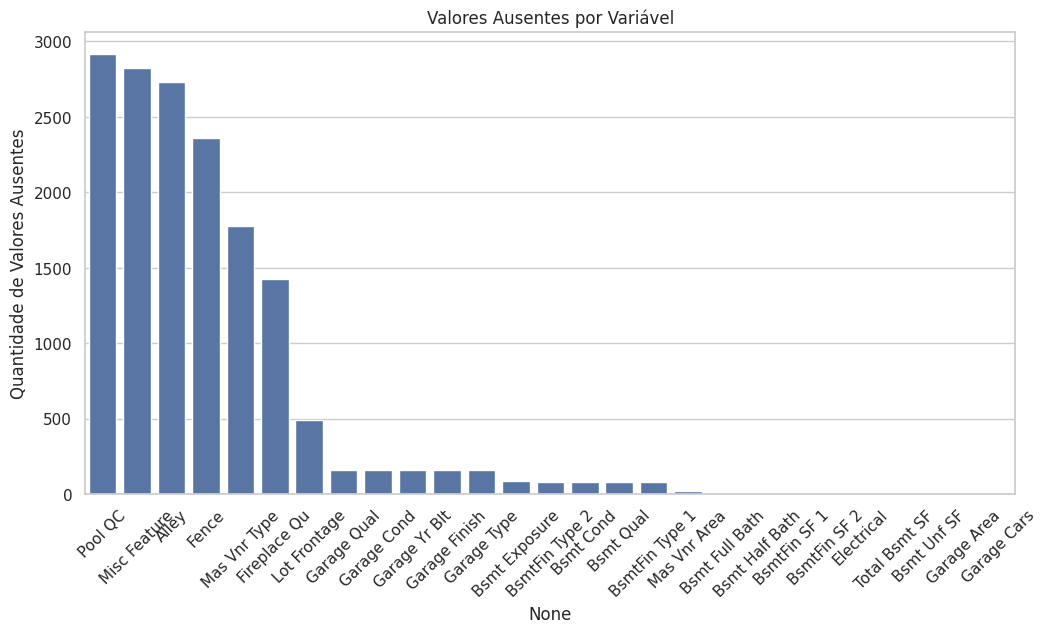

In [7]:
if not missing_data.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_data.index, y=missing_data.values)
    plt.title("Valores Ausentes por Variável")
    plt.ylabel("Quantidade de Valores Ausentes")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Nenhum valor ausente encontrado.")


In [8]:
print("\nEstatísticas descritivas das variáveis numéricas:")
print(df.describe().transpose())


Estatísticas descritivas das variáveis numéricas:
                  count          mean           std          min  \
Order            2930.0  1.465500e+03  8.459625e+02          1.0   
PID              2930.0  7.144645e+08  1.887308e+08  526301100.0   
MS SubClass      2930.0  5.738737e+01  4.263802e+01         20.0   
Lot Frontage     2440.0  6.922459e+01  2.336533e+01         21.0   
Lot Area         2930.0  1.014792e+04  7.880018e+03       1300.0   
Overall Qual     2930.0  6.094881e+00  1.411026e+00          1.0   
Overall Cond     2930.0  5.563140e+00  1.111537e+00          1.0   
Year Built       2930.0  1.971356e+03  3.024536e+01       1872.0   
Year Remod/Add   2930.0  1.984267e+03  2.086029e+01       1950.0   
Mas Vnr Area     2907.0  1.018968e+02  1.791126e+02          0.0   
BsmtFin SF 1     2929.0  4.426296e+02  4.555908e+02          0.0   
BsmtFin SF 2     2929.0  4.972243e+01  1.691685e+02          0.0   
Bsmt Unf SF      2929.0  5.592625e+02  4.394942e+02          0.0 

<p>
Na análise de dados, a identificação de <strong>variáveis categóricas</strong> é uma etapa essencial, pois essas variáveis representam dados qualitativos que são organizados em categorias ou grupos distintos. As variáveis categóricas podem ser analisadas para identificar padrões de frequência, diferenças entre grupos e sua relação com variáveis dependentes, como o preço de venda. Ferramentas como tabelas de contingência, gráficos de barras e análises de associação são frequentemente utilizadas para explorar essas variáveis e obter insights significativos no contexto da análise. E nem sempre podem estrar representadas em string!
</p>


In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nVariáveis categóricas:")
print(categorical_cols)


Variáveis categóricas:
Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')


In [10]:
df.nunique().sort_values()

Street               2
Alley                2
Central Air          2
Land Slope           3
Bsmt Half Bath       3
                  ... 
Bsmt Unf SF       1137
Gr Liv Area       1292
Lot Area          1960
Order             2930
PID               2930
Length: 82, dtype: int64

In [11]:
valores_unicos = df.nunique()
possiveis_categoricas = valores_unicos[valores_unicos <= 30]
print("Possíveis variáveis categóricas:")
print(possiveis_categoricas)

Possíveis variáveis categóricas:
MS SubClass       16
MS Zoning          7
Street             2
Alley              2
Lot Shape          4
Land Contour       4
Utilities          3
Lot Config         5
Land Slope         3
Neighborhood      28
Condition 1        9
Condition 2        8
Bldg Type          5
House Style        8
Overall Qual      10
Overall Cond       9
Roof Style         6
Roof Matl          8
Exterior 1st      16
Exterior 2nd      17
Mas Vnr Type       4
Exter Qual         4
Exter Cond         5
Foundation         6
Bsmt Qual          5
Bsmt Cond          5
Bsmt Exposure      4
BsmtFin Type 1     6
BsmtFin Type 2     6
Heating            6
Heating QC         5
Central Air        2
Electrical         5
Bsmt Full Bath     4
Bsmt Half Bath     3
Full Bath          5
Half Bath          3
Bedroom AbvGr      8
Kitchen AbvGr      4
Kitchen Qual       5
TotRms AbvGrd     14
Functional         8
Fireplaces         5
Fireplace Qu       5
Garage Type        6
Garage Finish      3
G

<h5>Análise Univariada</h5>

<p>
A <strong>análise univariada</strong> da variável <code>SalePrice</code> (preço de venda) foca na compreensão de sua distribuição e principais características estatísticas, como média, mediana, desvio padrão e assimetria. Essa análise permite identificar a tendência central, dispersão e possíveis outliers no conjunto de dados. Além disso, visualizações como histogramas e boxplots são ferramentas úteis para observar o comportamento da variável, revelando padrões, assimetrias ou concentrações que podem influenciar diretamente na modelagem e interpretação dos resultados.
</p>


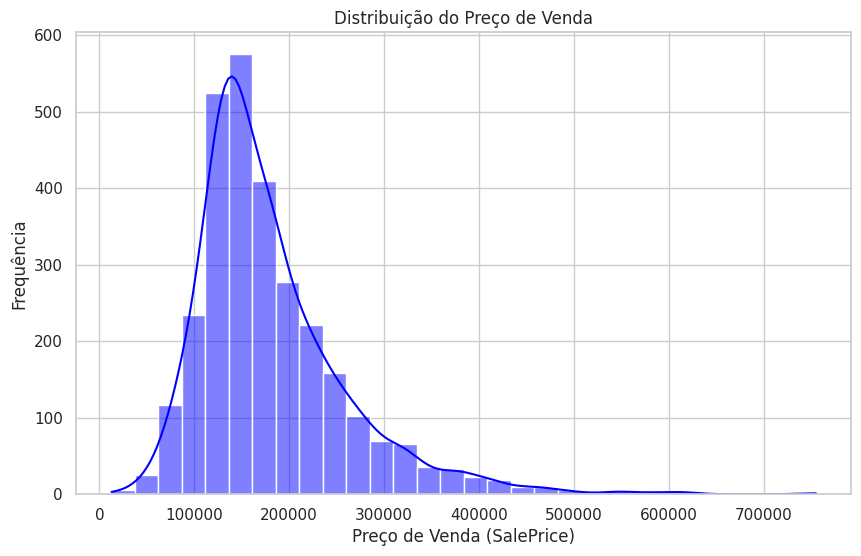

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df["SalePrice"], kde=True, color="blue", bins=30)
plt.xlabel("Preço de Venda (SalePrice)")
plt.ylabel("Frequência")
plt.title('Distribuição do Preço de Venda')
plt.show()

In [13]:
print(df["SalePrice"].describe())
print(df["SalePrice"].quantile([0.95]))

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64
0.95    335000.0
Name: SalePrice, dtype: float64


<p>
A variável <code>SalePrice</code> apresenta uma <strong>distribuição assimétrica à direita</strong>, o que indica que a maioria das propriedades está concentrada em faixas de preços mais baixas. A maior parte dos preços está abaixo de 300.000 dólares, com um pico evidente na faixa entre 150.000 e 200.000 dólares. A análise da curva de densidade suavizada reforça essa assimetria, destacando a concentração de propriedades em preços menores. Além disso, a cauda longa no lado direito da distribuição revela a presença de algumas propriedades com preços excepcionalmente altos, que podem ser considerados <strong>outliers</strong>. Esses padrões são importantes para entender a dinâmica dos preços e orientar análises mais aprofundadas.
</p>


In [14]:
saleprice_skewness = skew(df["SalePrice"], bias=False)
print(f"Skewness de SalePrice: {saleprice_skewness}")


Skewness de SalePrice: 1.743500075737647


<p>
A interpretação do coeficiente de <strong>skewness</strong> (assimetria) é uma medida essencial para avaliar a simetria da distribuição de uma variável. Um valor <strong>positivo</strong> indica uma <em>assimetria à direita</em>, caracterizada por uma cauda mais longa no lado direito da distribuição, como observado nos gráficos da variável <code>SalePrice</code>. Um valor <strong>negativo</strong> indica uma <em>assimetria à esquerda</em>, onde a cauda mais longa está no lado esquerdo. Já valores <strong>próximos de 0</strong> sugerem uma distribuição aproximadamente simétrica. Essa análise é fundamental para compreender a natureza da variável e suas implicações em modelos estatísticos ou preditivos.
</p>


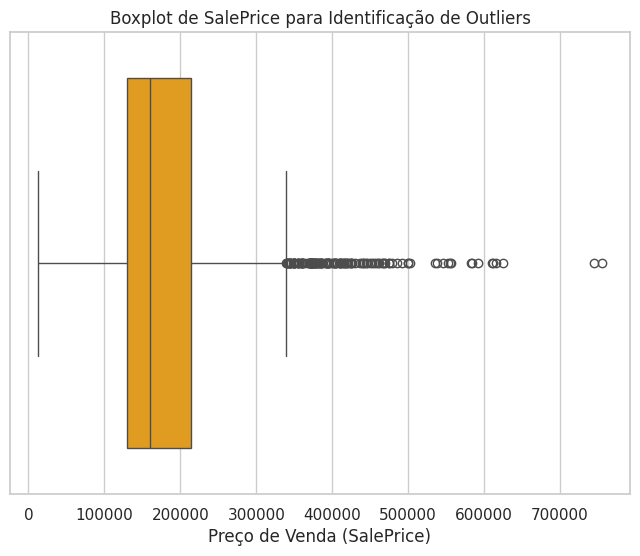

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["SalePrice"], color="orange")
plt.title("Boxplot de SalePrice para Identificação de Outliers")
plt.xlabel("Preço de Venda (SalePrice)")
plt.show()

<p>
A análise do gráfico de <strong>boxplot</strong> para a variável <code>SalePrice</code> destaca importantes características da distribuição dos dados. A linha dentro da caixa representa a <strong>mediana</strong>, que está em torno de 200.000 dólares, refletindo o preço central da maioria das propriedades. A maior parte dos dados está concentrada no <strong>intervalo interquartil (IQR)</strong>, que varia aproximadamente entre 150.000 e 250.000 dólares, abrangendo cerca de 50% das observações. No entanto, uma análise baseada no princípio de Pareto revela que uma minoria das propriedades, representada por valores acima de 300.000 dólares, contribui de forma desproporcional para o valor total. Esses valores são identificados como <strong>outliers</strong>, indicados pelos pontos isolados no gráfico. Entre eles, um ou mais valores ultrapassam 700.000 dólares, reforçando a existência de propriedades de altíssimo valor que desviam significativamente da norma, o que pode influenciar análises estatísticas e preditivas.
</p>


<h4>Seleção de Variáveis para ANOVA</h4>

<p><strong>1. Neighborhood (Bairros)</strong></p>
<p><em>Motivo da Escolha:</em> A localização é um dos fatores mais importantes no mercado imobiliário, com bairros apresentando preços médios significativamente diferentes.</p>
<p><em>Níveis para ANOVA:</em> Cada bairro é considerado um nível, permitindo comparações diretas entre eles.</p>

<p><strong>2. OverallQual (Qualidade Geral dos Materiais e Acabamentos)</strong></p>
<p><em>Motivo da Escolha:</em> A qualidade dos materiais e acabamentos impacta diretamente o preço de venda. Propriedades de alta qualidade são geralmente mais valorizadas.</p>
<p><em>Níveis para ANOVA:</em> Classificações de qualidade (de 1 a 10) fornecem grupos claros para análise.</p>

<p><strong>3. GarageCars (Capacidade da Garagem em Carros)</strong></p>
<p><em>Motivo da Escolha:</em> O tamanho da garagem é um fator prático e valorizado pelos compradores. Garagens maiores tendem a influenciar positivamente o preço.</p>
<p><em>Níveis para ANOVA:</em> O número de carros suportados (0, 1, 2, etc.) fornece uma divisão natural para comparação.</p>


<p>
O <strong>pré-processamento</strong> dos dados foi realizado com base em dois aspectos principais: (i) devido à sensibilidade da técnica ANOVA de lidar com valores nulos e constatou que 1 registro contém dados falatantes, adotou-se a premissa de <strong>excluir todo o registro</strong>. É importante destacar que lidar com valores missing exige técnicas específicas e conhecimento do domínio do negócio para minimizar impactos na análise. (ii) Além disso, foi realizada a <strong>padronização dos rótulos das features selecionadas</strong>, removendo espaços nos nomes das variáveis para garantir consistência e facilitar o processamento posterior. Esses passos foram essenciais para preparar o conjunto de dados para a aplicação das técnicas estatísticas.
</p>


In [16]:
print(missing_data)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
dtype: int64


In [17]:
feature_anova = ['Neighborhood', 'Garage Cars', 'Overall Qual', 'SalePrice']
df_anova = df[feature_anova]
df_anova.head()

,Neighborhood,Garage Cars,Overall Qual,SalePrice
0,NAmes,2.0,6,215000
1,NAmes,1.0,5,105000
2,NAmes,1.0,6,172000
3,NAmes,2.0,7,244000
4,Gilbert,2.0,5,189900


In [18]:
df_anova.shape

(2930, 4)

In [19]:
df_anova.dropna(axis=0, inplace=True)

In [20]:
df_anova.shape

(2929, 4)

In [21]:
df_anova.columns

Index(['Neighborhood', 'Garage Cars', 'Overall Qual', 'SalePrice'], dtype='object')

In [22]:
df_anova.rename(columns={'Garage Cars': 'GarageCars', 'Overall Qual':'OverallQual'}, inplace=True)


In [23]:
df_anova.head()

,Neighborhood,GarageCars,OverallQual,SalePrice
0,NAmes,2.0,6,215000
1,NAmes,1.0,5,105000
2,NAmes,1.0,6,172000
3,NAmes,2.0,7,244000
4,Gilbert,2.0,5,189900


<h5>Neighborhood vs. SalePrice</h5>
<p>
<strong>Objetivo:</strong> Analisar como diferentes bairros influenciam o preço médio das propriedades.
</p>
<p>
Os bairros podem desempenhar um papel crucial na determinação do preço de venda das propriedades? Empiricamente, fatores como localização, infraestrutura, segurança e proximidade a serviços essenciais variam entre regiões, e se não tivermos de posse disso, como faremos? </p>

<p>Nesta análise, a variável <code>Neighborhood</code> será examinada em relação ao <code>SalePrice</code>, utilizando a ANOVA para identificar diferenças significativas entre os preços médios das propriedades nos diferentes bairros.
</p>


In [24]:
df_anova.groupby('Neighborhood')['SalePrice'].mean()

Neighborhood
Blmngtn    196661.678571
Blueste    143590.000000
BrDale     105608.333333
BrkSide    124756.250000
ClearCr    208662.090909
CollgCr    201803.434457
Crawfor    207550.834951
Edwards    130843.381443
Gilbert    190646.575758
Greens     193531.250000
GrnHill    280000.000000
IDOTRR     103240.336957
Landmrk    137000.000000
MeadowV     95756.486486
Mitchel    162226.631579
NAmes      145097.349887
NPkVill    140710.869565
NWAmes     188406.908397
NoRidge    330319.126761
NridgHt    322018.265060
OldTown    123991.891213
SWISU      135071.937500
Sawyer     136751.152318
SawyerW    184070.184000
Somerst    229707.324176
StoneBr    324229.196078
Timber     246599.541667
Veenker    248314.583333
Name: SalePrice, dtype: float64

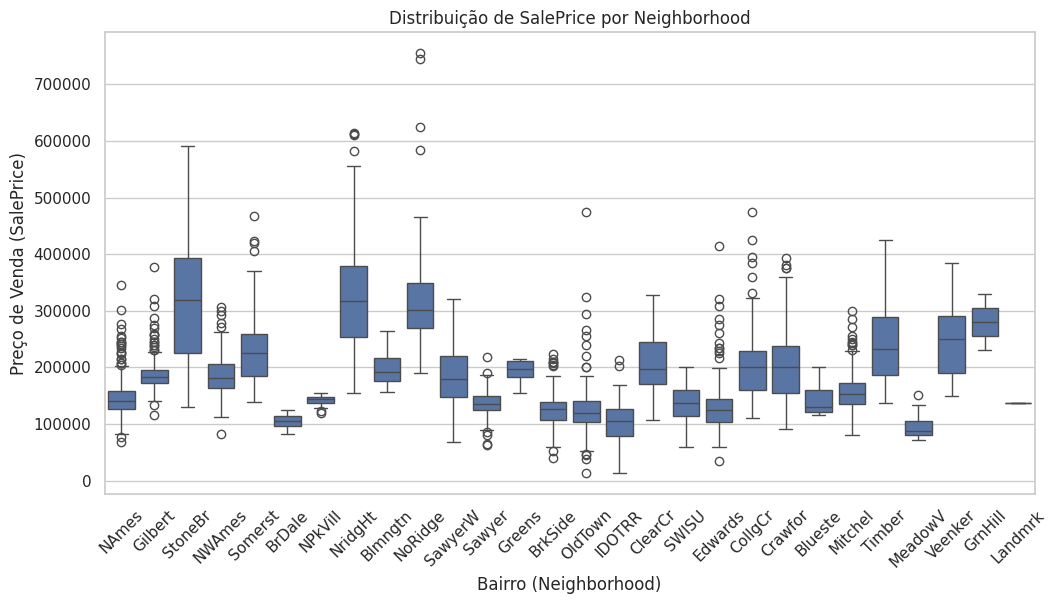

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_anova, x='Neighborhood', y='SalePrice')
plt.xticks(rotation=45)
plt.title('Distribuição de SalePrice por Neighborhood')
plt.ylabel('Preço de Venda (SalePrice)')
plt.xlabel('Bairro (Neighborhood)')
plt.show()

<p>
A análise da relação entre <code>Neighborhood</code> e <code>SalePrice</code> revela padrões claros no impacto da localização sobre os preços das propriedades. Bairros como <strong>NridgHt</strong> e <strong>StoneBr</strong> possuem preços consistentemente altos, refletindo maior valorização e exclusividade, enquanto bairros como <strong>Edwards</strong> e <strong>BrDale</strong> apresentam preços médios mais baixos, indicando menor valorização imobiliária. A variabilidade de preços também varia entre os bairros: regiões como <strong>NAmes</strong> e <strong>Gilbert</strong> mostram ampla dispersão, incluindo outliers significativos, enquanto <strong>BrDale</strong> apresenta uma faixa de preços mais estreita. Esses resultados reforçam que o bairro é um forte indicador do preço das propriedades, com áreas de prestígio mostrando maior demanda e preços elevados.
</p>


<h5>OverallQual vs. SalePrice</h5>
<p>
<strong>Objetivo:</strong> Explorar como a qualidade geral dos materiais e acabamentos influencia o preço de venda.
</p>
<p>
A variável <code>OverallQual</code> mede a qualidade geral dos materiais e acabamentos de uma propriedade, com classificações que variam de 1 (qualidade muito baixa) a 10 (qualidade excelente). Essa característica tem um impacto direto no preço de venda, pois propriedades com materiais e acabamentos superiores geralmente são mais valorizadas. Faz sentido? vamos testar? </p>

In [26]:
df_anova.groupby('OverallQual')['SalePrice'].mean()

OverallQual
1      48725.000000
2      52325.307692
3      83185.975000
4     106485.097345
5     134732.908981
6     162130.318306
7     205025.760797
8     270913.594286
9     368336.766355
10    450217.322581
Name: SalePrice, dtype: float64

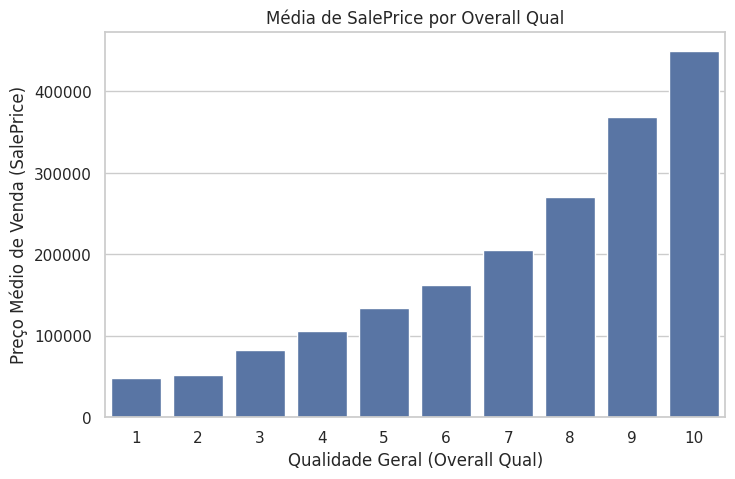

In [27]:
avg_price_quality = df_anova.groupby('OverallQual')['SalePrice'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_price_quality, x='OverallQual', y='SalePrice')
plt.title('Média de SalePrice por Overall Qual')
plt.ylabel('Preço Médio de Venda (SalePrice)')
plt.xlabel('Qualidade Geral (Overall Qual)')
plt.show()

<p>
A análise de <code>OverallQual</code> mostra uma <strong>tendência crescente</strong>, onde o preço médio de venda (<code>SalePrice</code>) aumenta consistentemente com a qualidade geral. Casas com qualidade superior (níveis 9 e 10) apresentam preços médios significativamente mais altos, frequentemente acima de $400.000.
</p>


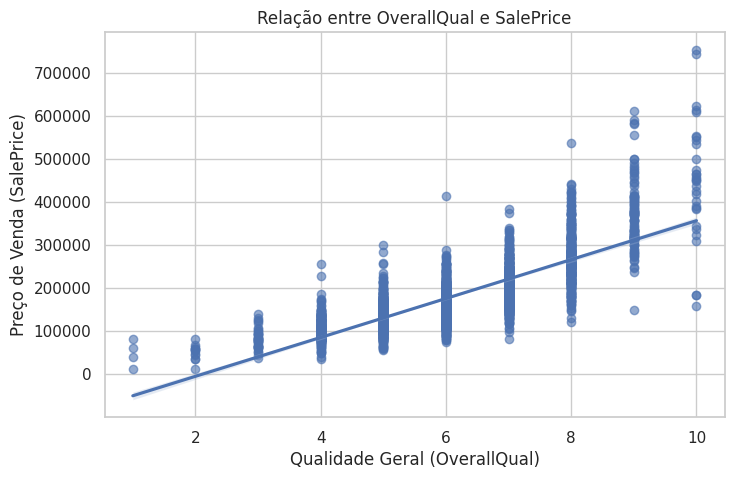

In [28]:
plt.figure(figsize=(8, 5))
sns.regplot(data=df_anova, x='OverallQual', y='SalePrice', scatter_kws={'alpha':0.6})
plt.title('Relação entre OverallQual e SalePrice')
plt.ylabel('Preço de Venda (SalePrice)')
plt.xlabel('Qualidade Geral (OverallQual)')
plt.show()

<p>
A análise de <code>OverallQual</code> revela uma <strong>correlação linear positiva</strong> com <code>SalePrice</code>, evidenciada pela linha de regressão ajustada. No entanto, há <strong>variabilidade dentro de cada nível</strong> de qualidade, indicando que outros fatores também influenciam o preço final.
</p>


<h5>GarageCars vs. SalePrice</h5>
<p>
<strong>Objetivo:</strong> Avaliar o impacto do tamanho da garagem no preço de venda.
</p>
<p>
A variável <code>GarageCars</code> representa a capacidade da garagem, medida pelo número de carros que ela pode acomodar.
</p>


In [29]:
df_anova.groupby('GarageCars')['SalePrice'].mean()

GarageCars
0.0    104949.254777
1.0    127267.422879
2.0    183562.102932
3.0    310304.622995
4.0    228748.687500
5.0    126500.000000
Name: SalePrice, dtype: float64

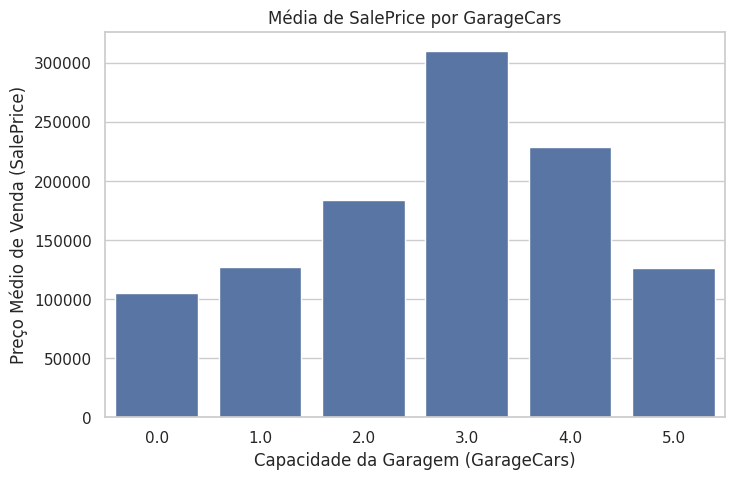

In [30]:
avg_price_garage = df_anova.groupby('GarageCars')['SalePrice'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_price_garage, x='GarageCars', y='SalePrice')
plt.title('Média de SalePrice por GarageCars')
plt.ylabel('Preço Médio de Venda (SalePrice)')
plt.xlabel('Capacidade da Garagem (GarageCars)')
plt.show()

<p>
A análise de <code>GarageCars</code> mostra que o <strong>preço médio de venda</strong> (<code>SalePrice</code>) aumenta com a capacidade da garagem, atingindo o pico em garagens para 3 carros (~$300.000), que são altamente valorizadas. No entanto, garagens maiores (4 ou mais carros) apresentam preços médios menores.
</p>

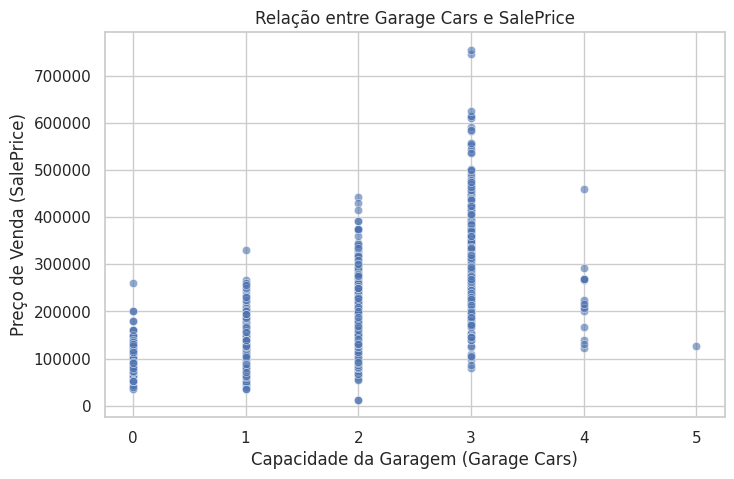

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_anova, x='GarageCars', y='SalePrice', alpha=0.6)
plt.title('Relação entre Garage Cars e SalePrice')
plt.ylabel('Preço de Venda (SalePrice)')
plt.xlabel('Capacidade da Garagem (Garage Cars)')
plt.show()

<p>
A análise de <code>GarageCars</code> indica uma <strong>correlação positiva</strong> entre a capacidade da garagem e o preço de venda (<code>SalePrice</code>), com propriedades maiores tendendo a preços mais altos. Capacidades de 0, 1 e 2 carros apresentam maior densidade de propriedades, enquanto garagens para 3 carros têm preços significativamente maiores, mas também mostram maior variabilidade, incluindo outliers. Garagens para 4 ou 5 carros são raras e algumas apresentam preços muito elevados, sugerindo influência de fatores adicionais, como localização ou qualidade geral.
</p>


<h4>ANOVA: Comparação de Preços Médios</h4>
<p>
Nesta etapa, aplica-se o teste de <strong>ANOVA</strong> para avaliar se há diferenças significativas nos preços de venda (<code>SalePrice</code>) em relação às três características selecionadas: <code>Neighborhood</code>, <code>OverallQual</code>, e <code>GarageCars</code>. Para cada variável, o teste de ANOVA compara as médias dos preços entre os grupos formados por suas categorias. O objetivo é identificar se a variação do preço médio pode ser explicada de forma estatisticamente significativa por essas características. Os valores-p resultantes para cada análise são armazenados em um dicionário consolidado para facilitar a revisão e interpretação dos resultados.
</p>


<h5>Princípios do ANOVA</h5>
<p>
<strong>Hipóteses:</strong>
<ul>
  <li><strong>H₀:</strong> Todas as médias dos grupos são iguais.</li>
  <li><strong>H₁:</strong> Pelo menos uma média de grupo é diferente.</li>
</ul>
</p>
<p>
<strong>Divisão da Variância:</strong> O ANOVA divide a variância total em duas partes:
<ul>
  <li><em>Entre os grupos:</em> Diferença nas médias dos grupos.</li>
  <li><em>Dentro dos grupos:</em> Variabilidade interna de cada grupo.</li>
</ul>
O teste utiliza a estatística F para avaliar a relação entre essas variâncias.
</p>
<p>
<strong>Resultado do Teste:</strong> O valor-p representa a probabilidade de que as diferenças observadas entre as médias sejam devido ao acaso. 
Se <strong>valor-p < 0.05</strong>, rejeitamos H₀, indicando diferenças significativas.
</p>


In [ ]:
anova_results = {}

anova_neighborhood = f_oneway(*[df_anova[df_anova['Neighborhood'] == n]['SalePrice'] for n in df_anova['Neighborhood'].unique()])
anova_results['Neighborhood'] = anova_neighborhood.pvalue

anova_overallqual = f_oneway(*[df_anova[df_anova['OverallQual'] == q]['SalePrice'] for q in df_anova['OverallQual'].unique()])
anova_results['Overall Qual'] = anova_overallqual.pvalue

anova_garagecars = f_oneway(*[df_anova[df_anova['GarageCars'] == g]['SalePrice'] for g in df_anova['GarageCars'].unique()])
anova_results['Garage Cars'] = anova_garagecars.pvalue

results = {"ANOVA Results (p-values)": anova_results}
tools.display_dataframe_to_user(name="Resultados de ANOVA e Validação de Pressupostos", dataframe=pd.DataFrame(results))

Resultados de ANOVA e Validação de Pressupostos


<p>
Os resultados da ANOVA mostram que, para todas as variáveis analisadas (<code>Neighborhood</code>, <code>OverallQual</code>, e <code>GarageCars</code>), os valores-p foram iguais a <strong>0</strong>, indicando diferenças significativas nos preços médios de venda. Conclui-se que a localização, a qualidade geral dos materiais e acabamentos, e o tamanho da garagem são fatores relevantes que impactam diretamente o preço de venda.
</p>


In [33]:
from statsmodels.formula.api import ols

# Melting the filtered data for analysis in the OLS model
melted_data_for_ols_Neighborhood = pd.melt(df_anova, id_vars=['Neighborhood'], value_vars=['SalePrice'])
# Ordinary Least Squares (OLS) model
model_Neighborhood = ols('value ~ Neighborhood', data=melted_data_for_ols_Neighborhood).fit()
# Performing ANOVA
anova_table_Neighborhood = sm.stats.anova_lm(model_Neighborhood, typ=2)

# Melting the filtered data for analysis in the OLS model
melted_data_for_ols_OverallQual = pd.melt(df_anova, id_vars=['OverallQual'], value_vars=['SalePrice'])
# Ordinary Least Squares (OLS) model
model_OverallQual = ols('value ~ OverallQual', data=melted_data_for_ols_OverallQual).fit()
# Performing ANOVA
anova_table_OverallQual = sm.stats.anova_lm(model_OverallQual, typ=2)

# Melting the filtered data for analysis in the OLS model
melted_data_for_ols_GarageCars = pd.melt(df_anova, id_vars=['GarageCars'], value_vars=['SalePrice'])
# Ordinary Least Squares (OLS) model
model_GarageCars = ols('value ~ GarageCars', data=melted_data_for_ols_GarageCars).fit()
# Performing ANOVA
anova_table_GarageCars = sm.stats.anova_lm(model_GarageCars, typ=2)

In [34]:
# Displaying the ANOVA table
anova_table_Neighborhood

,sum_sq,df,F,PR(>F)
Neighborhood,1.071736e+13,27.0,144.404258,0.0
Residual,7.974285e+12,2901.0,NaN,NaN


In [35]:
# Displaying the ANOVA table
anova_table_OverallQual

,sum_sq,df,F,PR(>F)
OverallQual,1.194065e+13,1.0,5177.056079,0.0
Residual,6.750995e+12,2927.0,NaN,NaN


In [36]:
# Displaying the ANOVA table
anova_table_GarageCars

,sum_sq,df,F,PR(>F)
GarageCars,7.845707e+12,1.0,2117.325984,0.0
Residual,1.084594e+13,2927.0,NaN,NaN


<h4>Validação de Pressupostos para Interpretação da ANOVA</h4>
<p>
Antes de interpretar os resultados do teste ANOVA tradicional, é essencial validar seus pressupostos. A ANOVA assume que os dados seguem uma distribuição normal em cada grupo e que as variâncias entre os grupos são homogêneas. A validação desses pressupostos é crucial para garantir a confiabilidade dos resultados e evitar conclusões equivocadas. Caso essas condições não sejam atendidas, métodos alternativos, como testes não paramétricos, devem ser considerados.
</p>


<h5>Teste de Normalidade</h5>
<p>
<strong>Objetivo:</strong> Verificar se os resíduos do modelo ANOVA seguem uma distribuição normal, conforme exigido pelo pressuposto da ANOVA tradicional.
</p>
<p>
Para testar a normalidade, utiliza-se o <strong>teste de Shapiro-Wilk</strong>, bem como visualizações como o histograma e o <em>Q-Q Plot</em>. Resíduos que não seguem uma distribuição normal podem comprometer a validade dos resultados da ANOVA. Desvios significativos, especialmente nas extremidades, indicam que o pressuposto de normalidade foi violado, sendo necessário considerar alternativas não paramétricas para fazer inferências.
</p>

In [37]:
shapiro_tests = {}
shapiro_tests['Neighborhood'] = shapiro(df_anova['SalePrice'])[1]
shapiro_tests['OverallQual'] = shapiro(df_anova['SalePrice'])[1]
shapiro_tests['GarageCars'] = shapiro(df_anova['SalePrice'])[1]

results = {
    "Normalidade (Shapiro-Wilk p-values)": shapiro_tests
}

tools.display_dataframe_to_user(name="Validação de Pressupostos", dataframe=pd.DataFrame(results))

Validação de Pressupostos


<p>
Os p-valores extremamente baixos (2.408963e-43) indicam violação da normalidade dos resíduos. 
</p>


<h5>Teste de Homogeneidade das Variâncias</h5>
<p>
<strong>Objetivo:</strong> Avaliar se as variâncias dos grupos são homogêneas, uma condição essencial para a aplicação da ANOVA tradicional.
</p>
<p>
O teste de <strong>Levene</strong> ou de <strong>Bartlett</strong> pode ser usado para verificar a homogeneidade das variâncias. No scatterplot de resíduos versus valores ajustados, padrões como aumento da variabilidade (padrão em funil) sugerem <strong>heterocedasticidade</strong>. A violação deste pressuposto pode impactar a confiabilidade das conclusões, indicando a necessidade de técnicas robustas ou ajustes nos dados.
</p>


In [38]:
levene_tests = {}
levene_tests['Neighborhood'] = levene(*[df_anova[df_anova['Neighborhood'] == n]['SalePrice'] for n in df_anova['Neighborhood'].unique()]).pvalue
levene_tests['OverallQual'] = levene(*[df_anova[df_anova['OverallQual'] == q]['SalePrice'] for q in df_anova['OverallQual'].unique()]).pvalue
levene_tests['GarageCars'] = levene(*[df_anova[df_anova['GarageCars'] == g]['SalePrice'] for g in df_anova['GarageCars'].unique()]).pvalue

results = {
    "Homogeneidade (Levene p-values)": levene_tests
}

tools.display_dataframe_to_user(name="Validação de Pressupostos", dataframe=pd.DataFrame(results))

Validação de Pressupostos


<p>P-valores muito baixos para todas as características (Neighborhood, OverallQual, GarageCars), indicando que as variâncias entre os grupos não são homogêneas.</p>


<h5>Teste dos Resíduos com ANOVA Tradicional</h5>
<p>
<strong>Objetivo:</strong> Verificar se os resíduos do modelo ANOVA tradicional atendem aos pressupostos de normalidade, homogeneidade de variâncias e independência.
</p>
<p>
Os resíduos do modelo são as diferenças entre os valores observados e as médias estimadas para cada grupo. Na ANOVA tradicional, é crucial testar se esses resíduos:
</p>
<ul>
  <li>Seguem uma <strong>distribuição normal</strong>, validada por testes como Shapiro-Wilk ou QQ-Plot;</li>
  <li>Apresentam <strong>homogeneidade de variâncias</strong>, avaliada por testes como Levene ou Bartlett;</li>
  <li>São <strong>independentes</strong>, não pode haver multicolinearidade entre as varíaveis preditoras.</li>
</ul>


In [39]:
def plot_residuals(variable, data):
    model = ols(f'SalePrice ~ C({variable})', data=data).fit()
    residuals = model.resid
    
    # Histograma dos resíduos
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    sns.histplot(residuals, kde=True, color='blue')
    plt.title(f'Histograma dos Resíduos ({variable})')
    plt.xlabel('Resíduos')
    
    # Q-Q Plot
    plt.subplot(1, 3, 2)
    sm.qqplot(residuals, line='s', ax=plt.gca())
    plt.title(f'Q-Q Plot ({variable})')
    
    # Scatterplot: Resíduos vs Valores Ajustados
    fitted_values = model.fittedvalues
    plt.subplot(1, 3, 3)
    plt.scatter(fitted_values, residuals, alpha=0.6, color='red')
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.title(f'Resíduos vs Ajustados ({variable})')
    plt.xlabel('Valores Ajustados')
    plt.ylabel('Resíduos')
    
    plt.tight_layout()
    plt.show()

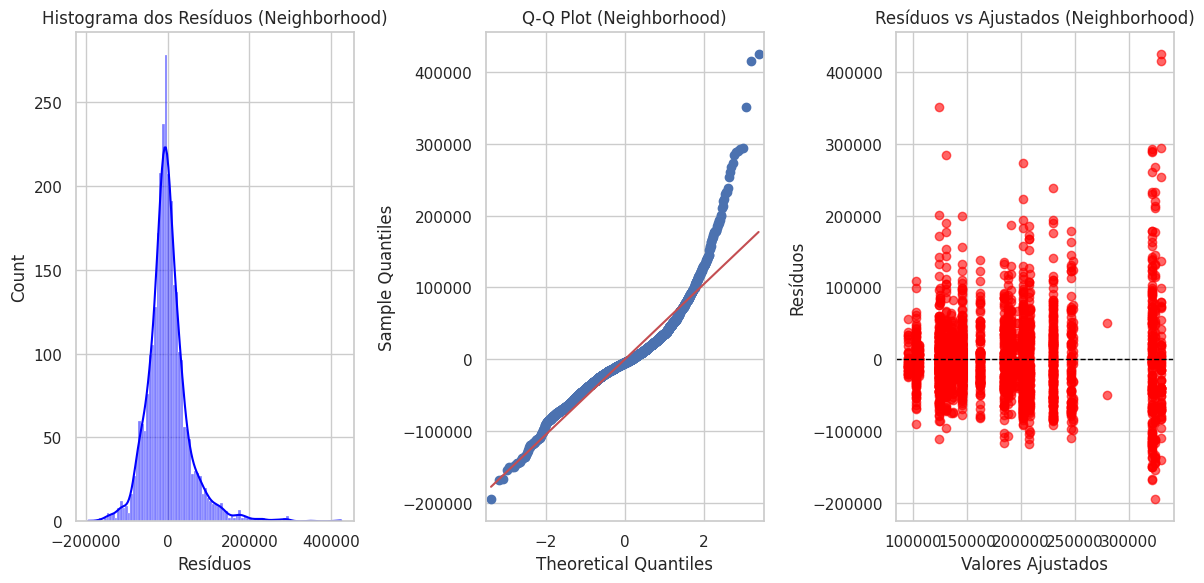

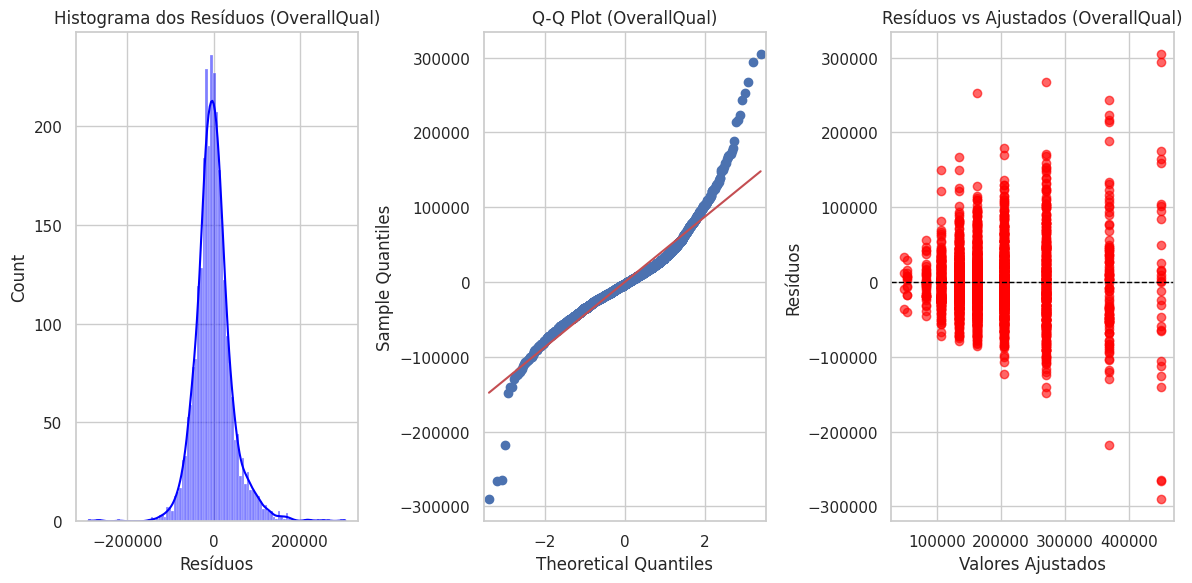

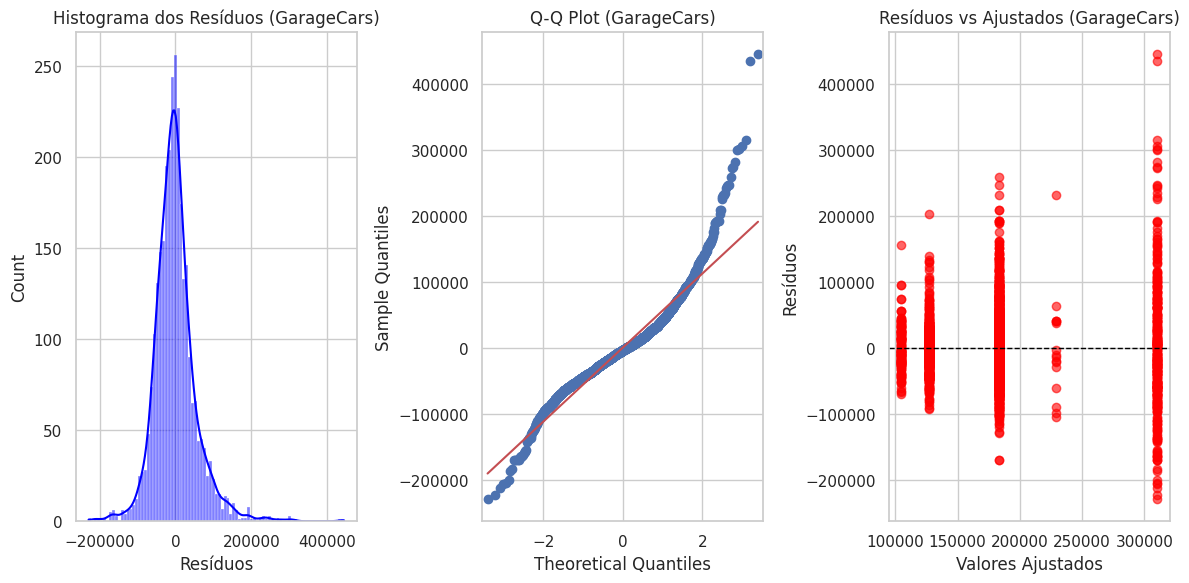

In [40]:
plot_residuals('Neighborhood', df_anova)
plot_residuals('OverallQual', df_anova)
plot_residuals('GarageCars', df_anova)

<p>
A análise dos resíduos revela que os <strong>pressupostos da ANOVA tradicional</strong> foram violados. O histograma dos resíduos mostra assimetria, indicando que a normalidade não é perfeita. No <strong>Q-Q Plot</strong>, os desvios das caudas reforçam a ausência de normalidade. O scatterplot de resíduos versus valores ajustados sugere <strong>heterocedasticidade</strong>, com maior variabilidade em valores ajustados mais altos, violando a homogeneidade das variâncias. Esses resultados destacam limitações na aplicação da ANOVA tradicional.
</p>


___

<h4>Testes não paramétricos</h4>

<p>
O <strong>teste de Kruskal-Wallis</strong> é uma alternativa não paramétrica à ANOVA, utilizado para comparar k amostras independentes (k > 2), especialmente quando as hipóteses de normalidade e homogeneidade das variâncias são violadas ou quando os dados estão em escala ordinal. Segundo Belfiore (2015), este teste verifica se as k amostras são provenientes da mesma população ou de populações com a mesma mediana (<code>μ</code>). Os dados são organizados em uma tabela de dupla entrada, onde as linhas representam as observações e as colunas, os grupos. Em casos com k = 2, o teste é equivalente ao teste Mann-Whitney. O Kruskal-Wallis é particularmente útil em situações com tamanhos de amostra pequenos ou dados que não atendem às premissas dos testes paramétricos, proporcionando uma análise robusta e confiável em cenários desafiadores. (BELFIORE, 2015)
</p>

<p>
Sendo uma alternativa não paramétrica ao ANOVA e utilizado quando as premissas de normalidade e homogeneidade das variâncias são violadas, esse teste de Kruskal-Wallis compara as medianas de dois ou mais grupos, sendo ideal para variáveis categóricas com múltiplos níveis (como <code>Neighborhood</code>) e uma variável contínua (<code>SalePrice</code>). 
</p>
<p>
<strong>Hipóteses:</strong>
<ul>
  <li><strong>H₀:</strong> As distribuições dos grupos são idênticas.</li>
  <li><strong>H₁:</strong> Pelo menos uma distribuição é diferente.</li>
</ul>
</p>
<p>
<strong>Funcionamento:</strong> Os valores são ranqueados, e o teste avalia diferenças nas somas dos rankings entre os grupos. O valor-p indica se as diferenças observadas são significativas:
<ul>
  <li><strong>Valor-p < 0.05:</strong> Rejeitamos H₀, indicando diferenças significativas.</li>
  <li><strong>Valor-p ≥ 0.05:</strong> Não rejeitamos H₀, sugerindo medianas similares.</li>
</ul>
</p>


In [ ]:
# Neighborhood
kruskal_neighborhood = kruskal(*[df_anova[df_anova['Neighborhood'] == n]['SalePrice'] for n in df_anova['Neighborhood'].unique()])

# OverallQual
kruskal_overallqual = kruskal(*[df_anova[df_anova['OverallQual'] == q]['SalePrice'] for q in df_anova['OverallQual'].unique()])

# GarageCars
kruskal_garagecars = kruskal(*[df_anova[df_anova['GarageCars'] == g]['SalePrice'] for g in df_anova['GarageCars'].unique()])

print("Kruskal-Wallis Results:")
print(f"Neighborhood: H-statistic = {kruskal_neighborhood.statistic}, p-value = {kruskal_neighborhood.pvalue}")
print(f"OverallQual: H-statistic = {kruskal_overallqual.statistic}, p-value = {kruskal_overallqual.pvalue}")
print(f"GarageCars: H-statistic = {kruskal_garagecars.statistic}, p-value = {kruskal_garagecars.pvalue}")

Kruskal-Wallis Results:
Neighborhood: H-statistic = 1799.0853609248172, p-value = 0.0
OverallQual: H-statistic = 1937.79982200856, p-value = 0.0
GarageCars: H-statistic = 1459.5960458881416, p-value = 0.0


<p>
Os resultados do teste de Kruskal-Wallis indicam que todas as variáveis analisadas (<code>Neighborhood</code>, <code>OverallQual</code>, e <code>GarageCars</code>) têm um impacto significativo no preço de venda (<code>SalePrice</code>). Com valores-p iguais a 0 para todas as variáveis, rejeitamos a hipótese nula, concluindo que há diferenças estatisticamente significativas entre os grupos. Esses resultados destacam que localização, qualidade geral e capacidade da garagem influenciam diretamente o preço dos imóveis.
</p>


<p>
Após os resultados do teste de <strong>Kruskal-Wallis</strong>, que indicaram diferenças significativas entre os grupos das variáveis <code>Neighborhood</code>, <code>OverallQual</code>, e <code>GarageCars</code>, utilizamos o <strong>gráfico de violino</strong> para ilustrar visualmente essas diferenças. Esse tipo de gráfico combina a distribuição dos dados em cada classe com uma representação da densidade, permitindo observar tanto a variabilidade interna dos grupos quanto a sobreposição entre eles. Dessa forma, os gráficos de violino reforçam os resultados estatísticos, destacando como cada classe dentro das variáveis analisadas contribui para a diferenciação nos preços de venda (<code>SalePrice</code>).
</p>


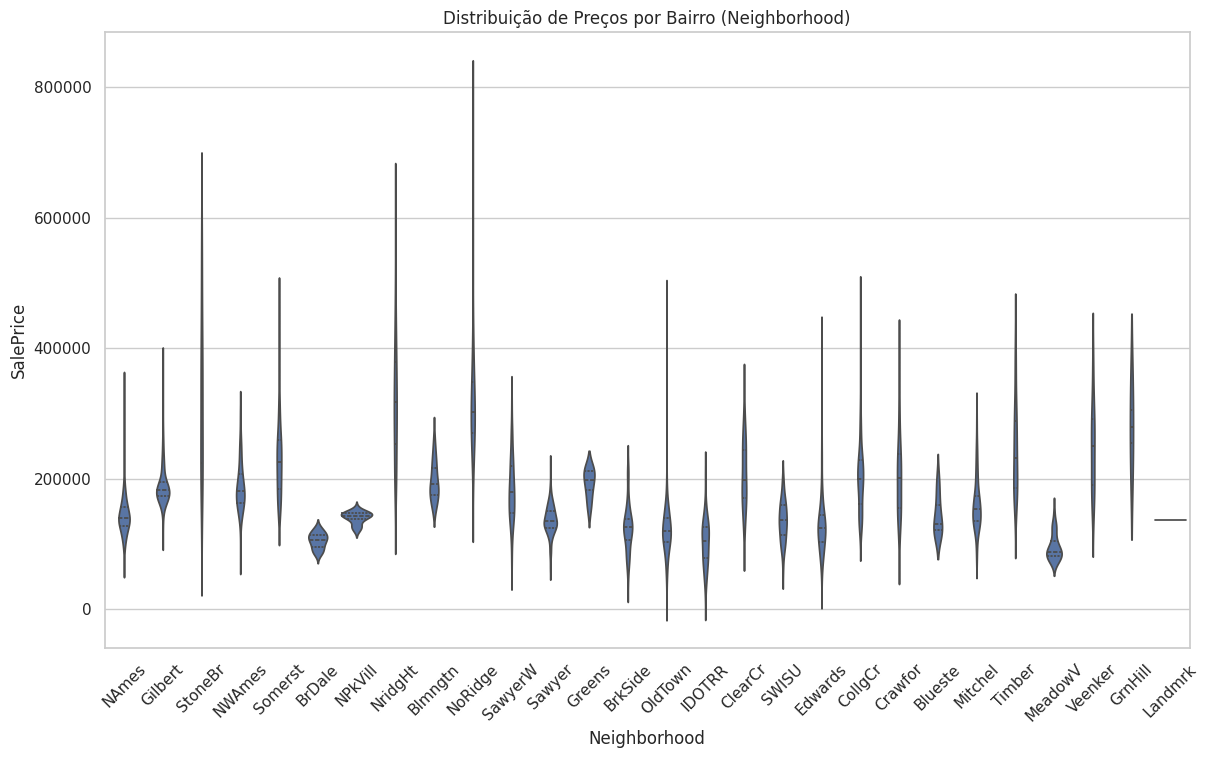

In [42]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Neighborhood', y='SalePrice', data=df_anova, inner='quartile')
plt.title('Distribuição de Preços por Bairro (Neighborhood)')
plt.xticks(rotation=45)
plt.show()

<p>
O gráfico de violino para <code>Neighborhood</code> mostra diferenças claras na distribuição de preços entre os bairros. Alguns bairros, como <strong>NridgHt</strong> e <strong>StoneBr</strong>, possuem distribuições com preços consistentemente altos, enquanto outros, como <strong>BrDale</strong> e <strong>MeadowV</strong>, apresentam preços mais baixos e menos variabilidade. A presença de distribuições assimétricas e outliers em alguns bairros reforça a importância da localização como fator determinante no preço de venda.
</p>


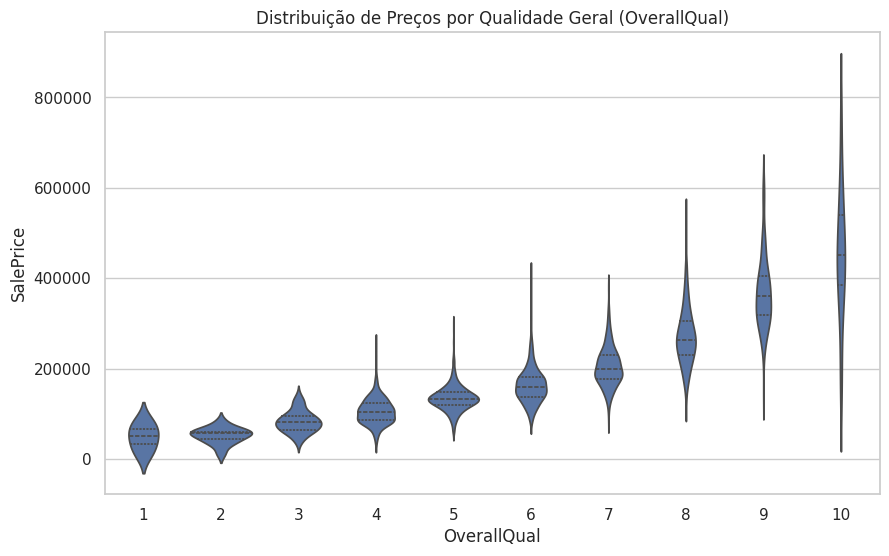

In [43]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='OverallQual', y='SalePrice', data=df_anova, inner='quartile')
plt.title('Distribuição de Preços por Qualidade Geral (OverallQual)')
plt.show()

<p>
Para <code>OverallQual</code>, esse plot revela uma tendência clara: conforme a qualidade geral dos materiais aumenta, o preço de venda (<code>SalePrice</code>) também cresce significativamente. Níveis mais altos de qualidade (9 e 10) apresentam distribuições mais amplas, incluindo propriedades com preços mais altos. Já níveis baixos de qualidade (1 a 4) têm uam densidade de concentração nos níveis de preços mais baixos. Isso reforça o impacto direto da qualidade dos materiais no valor de mercado das propriedades.
</p>


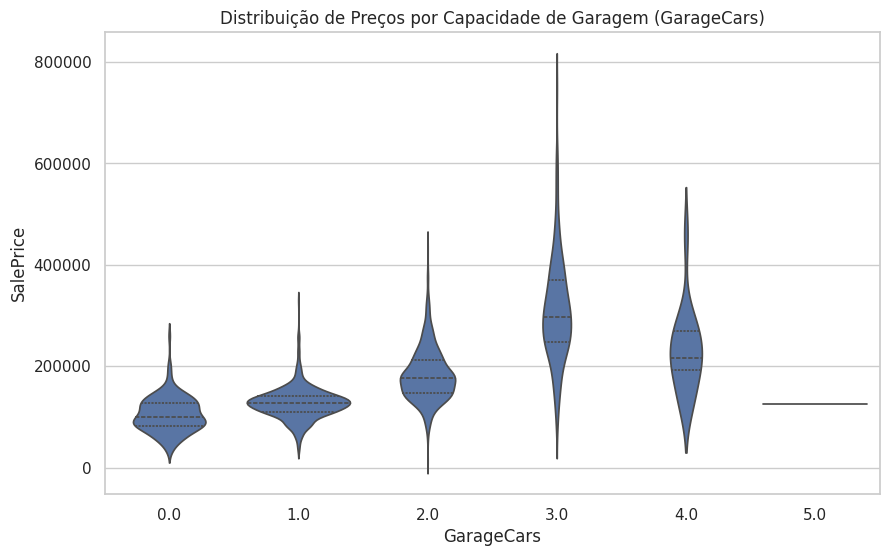

In [44]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='GarageCars', y='SalePrice', data=df_anova, inner='quartile')
plt.title('Distribuição de Preços por Capacidade de Garagem (GarageCars)')
plt.show()

<p>
Para a quantidade de garagens dessas casas, <code>GarageCars</code>, mostra que o <strong>preço de venda</strong> (<code>SalePrice</code>) tende a aumentar conforme a capacidade da garagem cresce, especialmente até o nível de 3 carros. Sendo esse nível (até 3 carros) que apresenta os preços mais elevados e uma ampla variabilidade.
</p>


<p>
Após os resultados do teste de <strong>Kruskal-Wallis</strong>, que indicaram diferenças significativas nos preços de venda (<code>SalePrice</code>) entre os bairros, foi necessário investigar mais profundamente como essas diferenças se manifestam entre pares de bairros específicos. Para isso, utilizamos o teste não paramétrico <strong>Mann-Whitney U</strong>, ideal para comparar duas amostras independentes, como os bairros "Gilbert" e "StoneBr". Esses bairros foram escolhidos com base em suas distribuições de preços no gráfico de violino, que indicaram diferenças aparentes em suas medianas e amplitudes. Essa abordagem permite identificar se as diferenças observadas entre os dois bairros são estatisticamente significativas.
</p>

<p>
Segundo Belfiore (2015), o teste U de Mann-Whitney é uma alternativa não paramétrica ao teste t de Student, utilizado para comparar duas amostras independentes quando a hipótese de normalidade é violada ou o tamanho da amostra é pequeno. Esse teste avalia a igualdade das medianas entre as amostras, utilizando a transformação dos dados em postos. Embora perca um pouco de poder em relação ao teste t, é amplamente aplicado devido à sua robustez em condições menos restritivas.
</p>


In [ ]:
group1 = df_anova[df_anova['Neighborhood'] == "Gilbert"]['SalePrice']
group2 = df_anova[df_anova['Neighborhood'] == "StoneBr"]['SalePrice']
mann_whitney_result = mannwhitneyu(group1, group2)

test_results = {
    "Mann-Whitney U (Neighborhoods entre Gilbert e StoneBr)": {
        "Statistic": mann_whitney_result.statistic,
        "p-value": mann_whitney_result.pvalue,
    }
}
tools.display_dataframe_to_user(name="Resultados dos Testes Não Paramétricos", dataframe=pd.DataFrame(test_results))

Resultados dos Testes Não Paramétricos


<p>O valor-p é extremamente pequeno (muito menor que 0.05), indicando que há uma diferença significativa entre os dois bairros analisados. Isso significa que as distribuições dos preços de venda (SalePrice) nesses dois bairros não são iguais.</p>

<p>
Após identificar diferenças significativas entre múltiplos grupos por meio de testes como o Kruskal-Wallis, é fundamental determinar quais grupos específicos diferem entre si. Para isso, utilizamos testes post hoc, que realizam comparações múltiplas para identificar pares de grupos com diferenças estatisticamente significativas (<a href="https://estatisticafacil.org/glossario/o-que-e-post-hoc-test/">Estatística Fácil</a>).
</p>
<p>
Entre os testes post hoc disponíveis, o teste de Dunn é uma análise não paramétrica eficaz para comparações múltiplas entre grupos independentes. Ele realiza comparações par a par entre os grupos e indica quais pares apresentam diferenças estatisticamente significativas em um determinado nível de significância (<a href="https://statorials.org/pt/teste-dunn/">Statorials</a>).
</p>

<p>
O ajuste de Bonferroni foi utilizado como parâmetro no teste de Dunn para corrigir o nível de significância em comparações múltiplas. Quando realizamos muitos testes simultaneamente, como no caso de comparações par a par entre grupos, o risco de cometer erros do tipo I (falsos positivos) aumenta. O ajuste de Bonferroni reduz esse risco, dividindo o nível de significância (<code>α</code>) pelo número de comparações realizadas. Isso garante que os resultados permaneçam confiáveis, mesmo ao lidar com múltiplos pares de grupos.
</p>



In [46]:
# Neighborhood
dunn_neighborhood = sp.posthoc_dunn(df_anova, val_col='SalePrice', group_col='Neighborhood', p_adjust='bonferroni')
# indicando os nomes dos bairros
dunn_neighborhood.index = dunn_neighborhood.columns = df_anova['Neighborhood'].unique()

# OverallQual
dunn_overallqual = sp.posthoc_dunn(df_anova, val_col='SalePrice', group_col='OverallQual', p_adjust='bonferroni')

# GarageCars
dunn_garagecars = sp.posthoc_dunn(df_anova, val_col='SalePrice', group_col='GarageCars', p_adjust='bonferroni')

results_dunn = {
    "Neighborhood": dunn_neighborhood,
    "OverallQual": dunn_overallqual,
    "GarageCars": dunn_garagecars
}

for variable, result in results_dunn.items():
    print(f"Resultados do Teste de Dunn para {variable}:")
    print(result)
    print("\n")

Resultados do Teste de Dunn para Neighborhood:
                NAmes   Gilbert       StoneBr        NWAmes       Somerst  \
NAmes    1.000000e+00  1.000000  9.476928e-11  3.642617e-09  1.000000e+00   
Gilbert  1.000000e+00  1.000000  1.000000e+00  1.000000e+00  4.599787e-01   
StoneBr  9.476928e-11  1.000000  1.000000e+00  1.000000e+00  5.757742e-14   
NWAmes   3.642617e-09  1.000000  1.000000e+00  1.000000e+00  5.855917e-14   
Somerst  1.000000e+00  0.459979  5.757742e-14  5.855917e-14  1.000000e+00   
BrDale   1.000000e+00  0.562534  3.707741e-19  1.741906e-30  1.000000e+00   
NPkVill  1.000000e+00  0.717226  1.814349e-16  8.814735e-21  1.000000e+00   
NridgHt  3.581866e-09  1.000000  1.000000e+00  1.000000e+00  1.220744e-14   
Blmngtn  1.000000e+00  0.845474  2.088080e-17  1.142385e-24  1.000000e+00   
NoRidge  1.000000e+00  1.000000  6.222772e-04  3.655834e-02  1.000000e+00   
SawyerW  1.000000e+00  1.000000  1.143249e-01  9.333566e-01  1.000000e+00   
Sawyer   6.763374e-14  1.0000

<p>
Para aprofundar a análise do impacto do bairro (<code>Neighborhood</code>) no preço de venda (<code>SalePrice</code>), será construído um <strong>heatmap</strong>. Este gráfico permitirá identificar pares de bairros onde o valor de alfa é menor que 0,05, representados por "1", enquanto pares com alfa maior ou igual a 0,05 serão representados por "0". Essa binarização facilita a visualização e compreensão das relações significativas entre os bairros.
</p>

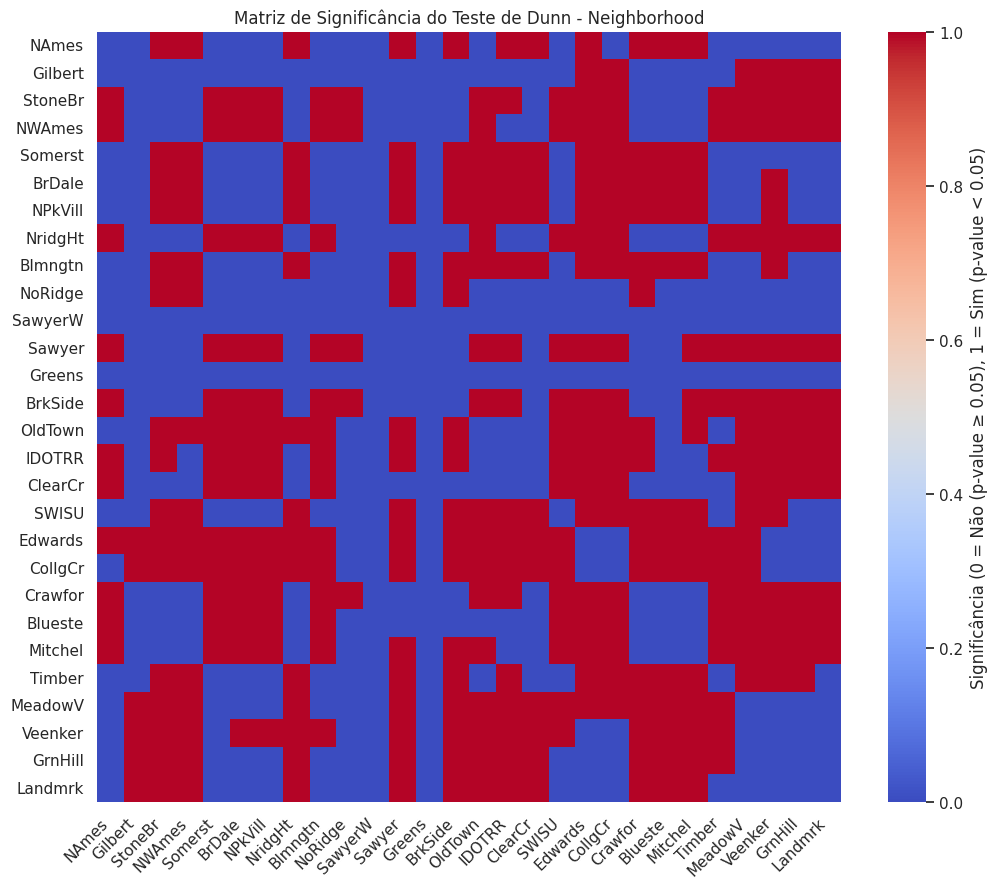

In [47]:
dunn_matrix_neighborhood = dunn_neighborhood.copy()

# Converter valores-p em uma matriz binária: 1 (significativo), 0 (não significativo)
significance_matrix = dunn_matrix_neighborhood.applymap(lambda x: 1 if x < 0.05 else 0)

plt.figure(figsize=(12, 10))
sns.heatmap(significance_matrix, cmap="coolwarm", cbar_kws={'label': 'Significância (0 = Não (p-value ≥ 0.05), 1 = Sim (p-value < 0.05)'})
plt.title("Matriz de Significância do Teste de Dunn - Neighborhood")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

<p>
O mapa de calor utiliza uma matriz binária para representar a significância estatística entre grupos de <code>Neighborhood</code>:
</p>
<ul>
  <li><strong>1</strong> (cor quente): Comparação significativa (<code>p-value < 0.05</code>), indicando diferença nos preços médios.</li>
  <li><strong>0</strong> (cor fria): Comparação não significativa (<code>p-value ≥ 0.05</code>), sugerindo preços médios semelhantes.</li>
</ul>
<p>
Por exemplo, uma célula quente entre "NAmes" e "StoneBr" indica preços significativamente diferentes, enquanto uma célula fria entre "NAmes" e "Gilbert" sugere preços médios semelhantes.
</p>


<h4>Conclusões</h4>

<p>
Com base na análise realizada, selecionamos três características do banco de dados para avaliar seu impacto no preço médio de venda (<code>SalePrice</code>) das propriedades. Essas características foram: <code>Neighborhood</code> (bairros), que representa as localizações físicas das propriedades dentro dos limites da cidade de Ames; <code>OverallQual</code> (qualidade geral), que reflete a qualidade dos materiais e acabamentos; e <code>GarageCars</code> (capacidade da garagem), que indica o número de carros que podem ser acomodados. Os testes aplicados, incluindo ANOVA tradicional, Kruskal-Wallis e testes post hoc (como o de Dunn), mostraram que todas as três variáveis influenciam significativamente o preço médio de venda. 
</p>
<p>
A análise revelou que as distribuições dos preços diferem estatisticamente entre bairros, níveis de qualidade geral e capacidades de garagem, indicando que essas características desempenham papéis determinantes na precificação dos imóveis. Além disso, ao investigar as comparações par a par entre categorias dentro de cada variável, observamos diferenças consistentes, reforçando a importância dessas variáveis como fatores críticos para a valorização das propriedades.
</p>
<p>
Como questão secundária, avaliamos a possibilidade de linearizar os preços das propriedades para implementar uma campanha promocional com preços únicos para todas as casas do portfólio. No entanto, os resultados indicam que essa abordagem não seria viável. As diferenças significativas encontradas entre os grupos sugerem que os preços são fortemente influenciados por características específicas, como localização, qualidade e tamanho da garagem. Assim, alinhar todos os preços a um valor único ignoraria essas variações e poderia levar a decisões de precificação inadequadas, afetando negativamente o equilíbrio do mercado e a percepção de valor dos imóveis.
</p>


___

Bibliografia

<p>
BELFIORE, Patrícia. <i>Estatística - Aplicada à Administração, Contabilidade e Economia com Excel e SPSS</i>. Rio de Janeiro: GEN LTC, 2015. E-book ISBN 9788595155596. Disponível em: <a href="https://unibb.minhabiblioteca.com.br/reader/books/9788595155596/">https://unibb.minhabiblioteca.com.br/reader/books/9788595155596/</a>. Acesso em: 04 dez. 2024.
</p>

<p>
Estatística Fácil. "O que é: Post-Hoc Test". Disponível em: <a href="https://estatisticafacil.org/glossario/o-que-e-post-hoc-test/">https://estatisticafacil.org/glossario/o-que-e-post-hoc-test/</a>. Acesso em: 05 dez. 2024.
</p>

<p>
KAGGLE. <i>Ames Housing Dataset</i>. Disponível em: <a href="https://www.kaggle.com/datasets/prevek18/ames-housing-dataset/data">https://www.kaggle.com/datasets/prevek18/ames-housing-dataset/data</a>. Acesso em: 08 dez. 2024.
</p>

<p>Statorials. "Teste de Dunn para comparações múltiplas". Disponível em: <a href="https://statorials.org/pt/teste-dunn/">https://statorials.org/pt/teste-dunn/</a>. Acesso em: 05 dez. 2024.</p>

<p>
VIRGILLITO, Salvatore B. Estatística Aplicada. Rio de Janeiro: Saraiva Uni, 2017. ISBN 9788547214753. Disponível em: https://unibb.minhabiblioteca.com.br/reader/books/9788547214753/. Acesso em: 04 dez. 2024.
</p>

